In [1]:
#! /usr/bin/env python

In [2]:
# import modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import tensorflow as tf
import keras
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from keras.losses import mean_squared_error
from keras import metrics

In [3]:
# pull dataset
nutrition = pd.read_pickle("./Nutrition_Full_Features.pkl")

In [4]:
# shuffle dataset
nutrition = nutrition.sample(frac=1)

In [5]:
#drop rows with NaN
nutrition = nutrition.dropna()

,name,Food Group,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Carbon Group,Land use (m2/100g),GHG(kgco2eq/100g),Water use (L/100g),Acidifying emissions(kgSO2eq per 100g),...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
412,Cola Soft Drink,Beverages,1.59,1500.0,0.106000,Sweetners / Honey,1.0114,0.5752,44.9,0.002145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
740,Cured Ham,Meats,3.00,125.0,2.400000,Pork,1.0156,0.7282,107.3,0.008265,...,0.0,0.0,0.0,2620.0,540.0,0.0,0.0,0.0,0.0,0.0
995,Seeds Sesame Seeds Whole Dried,Nuts and Seeds,1.00,100.0,1.000000,Nuts,0.5080,0.0278,191.4,0.001904,...,0.0,0.0,0.0,18759.0,21773.0,0.0,0.0,0.0,0.0,0.0
492,Cereal Corn Flakes,Breakfast Cereals,0.85,750.0,0.113333,Corn / Cereals,0.1628,0.0988,12.0,0.000673,...,54.0,0.0,339.0,67.0,196.0,0.0,0.0,0.0,0.0,0.0
563,Cream Cheese,Dairy and Egg Products,0.80,200.0,0.400000,Cheese,8.0642,2.1240,473.5,0.014894,...,1.0,0.0,7.0,8907.0,1483.0,10.0,20.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Cocoa Mix No Sugar Added Powder,Beverages,3.00,500.0,0.600000,Chocolate,2.3693,1.8681,20.9,0.001659,...,0.0,0.0,9.0,979.0,88.0,0.0,0.0,0.0,19.0,658.0
859,Turkey Breast Sliced Prepackaged,Meats,2.90,380.0,0.763158,Poultry (Chicken / Turkey),0.7490,0.6092,40.2,0.006439,...,0.0,0.0,0.0,1145.0,1024.0,2.0,6.0,5.0,0.0,0.0
187,Brioche,Baked Foods,2.00,200.0,1.000000,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,135.0,7904.0,1559.0,0.0,2.0,15.0,0.0,0.0
251,Raw Peanuts,Beans and Lentils,2.00,300.0,0.666667,Peanuts,0.6971,0.2497,143.1,0.001792,...,0.0,0.0,0.0,24426.0,15558.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Data for features
X_original = nutrition.iloc[:, 11:]
price = nutrition.iloc[:,2]
X_original = pd.concat([price,X_original], axis=1) # add price to the features array

y = nutrition.iloc[:, 7] # output array
y = y.to_numpy()

In [7]:
# normalise the data by feature column
X = preprocessing.normalize(X_original, axis=0)
X = pd.DataFrame(X_original, columns = X_original.columns) # processing loses columns headers so these must be reestablished
X = X.to_numpy()

In [8]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [9]:
#building keras Neural Network model

from keras.layers import Dense, Activation
from keras.models import Sequential
from keras import losses

# model type
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(8, activation = 'relu', input_dim = 41))

# Adding the second hidden layer
model.add(Dense(units = 16, activation = 'relu'))

# Could create for loop to check number of layers

#avoids overfitting
#https://keras.io/api/layers/regularization_layers/dropout/
model.add(keras.layers.Dropout(0.1))


# Adding the output layer
model.add(Dense(units = 1))


# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy']) #currently loss is the only thing we care about

# Training the Model
history = model.fit(X_train, y_train, batch_size = 10, epochs = 50, validation_split=0.2, verbose = 0)

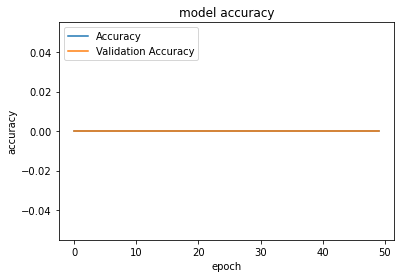

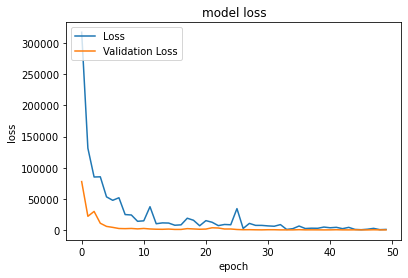

In [10]:
#plot learning curves

#accuracy no idea what this is for
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'Validation Loss'], loc='upper left')
plt.show()


In [11]:
#model evaluation
score = model.evaluate(X_test, y_test, verbose = 0)[1]

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 336       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [13]:
print('MSE without tuning: {}'.format(score))

MSE without tuning: 0.0047846888191998005


In [14]:
# get predicted values
y_pred = model.predict(X_test)

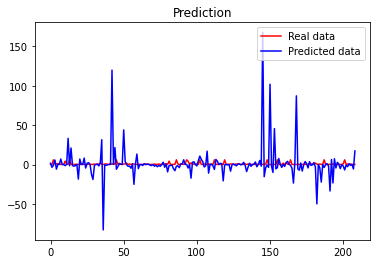

In [15]:
# plot predicted values against test values
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend(loc='upper right')
plt.show()

In [16]:
# checking the output metrics
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.78721144139647
Mean Squared Error: 412.3938102728831
Root Mean Squared Error: 20.307481632956932


In [17]:
y_mean = np.mean(y)
y_std = np.std(y)
print('Output Standard Deviation:', y_std)
print('Output Mean:', y_mean)

Output Standard Deviation: 1.6110865075846401
Output Mean: 0.8464732245681382


# Hyper Parameter Tuning Section

In [18]:
import kerastuner
from kerastuner import HyperModel

def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units', min_value=8, max_value=64, step=4), 
        activation = hp.Choice('dense_activation', 
                values=['relu', 'tanh','sigmoid','softmax']),
        input_dim = 41
        )
             
    )

    model.add(Dense(
        units=hp.Int('units', min_value=8, max_value=64, step=4), 
        activation = hp.Choice('dense_activation', 
                values=['relu', 'tanh','sigmoid','softmax'])
        )
             
    )
    
    model.add(
        keras.layers.Dropout(
            hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    step=0.01)
        )
    )

    # Adding the output layer
    model.add(Dense(units = 1))


    model.compile(
        optimizer = hp.Choice('dense_optimizer',
                values=['adam','SGD','rmsprop','adadelta'] ),
        loss = 'mean_squared_error',
        metrics = ['accuracy'],
    )
    return model

In [19]:
tuner = kerastuner.tuners.RandomSearch(
            build_model,
            objective='loss',
            max_trials=20,
            executions_per_trial=2,
            project_name='hp_values',
            overwrite=True)

In [20]:
tuner.search(X_train, y_train, epochs=50)

Trial 20 Complete [00h 00m 14s]
loss: 3.577166795730591

Best loss So Far: 0.4806698113679886
Total elapsed time: 00h 04m 27s
INFO:tensorflow:Oracle triggered exit


In [21]:
#collect best hyperparameters to rebuild model
best_hp = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hp)
# Training the Model
history = model.fit(X_train, y_train, batch_size = 10, epochs = 80, validation_split=0.2, verbose = 0)

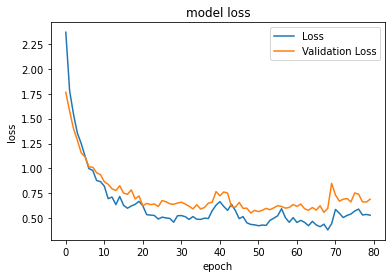

In [22]:
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [23]:
# get new predicted values with Hyperparameters
y_hp_pred = model.predict(X_test)

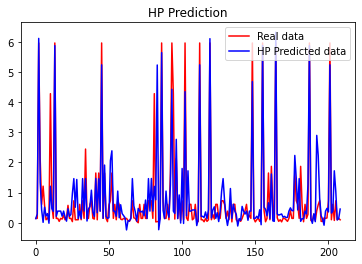

In [24]:
# plot predicted values against test values
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_hp_pred, color = 'blue', label = 'HP Predicted data')
plt.title('HP Prediction')
plt.legend(loc='upper right')
plt.show()

In [25]:
# checking the output metrics
from sklearn import metrics


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hp_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hp_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hp_pred)))

y_mean = np.mean(y_hp_pred)
y_std = np.std(y_hp_pred)
print('Output Standard Deviation:', y_std)
print('Output Mean:', y_mean)

Mean Absolute Error: 0.3926216939952955
Mean Squared Error: 0.5454940138834627
Root Mean Squared Error: 0.7385756656453438
Output Standard Deviation: 1.3553983
Output Mean: 0.83510256


In [26]:
#delete hp_values file for easy github committing
import shutil
shutil.rmtree('./hp_values')